# Example : non stabel SIR model 

This file contains the example of a (simple) mean field model of an SIR dynamics that has a unique fixed point that is not always exponentially stable (depending on the parameters "a" of the model). 

- For steady-state expectation, the refined mean field approximation cannot be applied when the fixed point is not expoentially stable. 
- We also show in this case, some problems arrise even for the transient regime

In [1]:
# To load the library
import rmftool as rmf
import time 

import importlib
importlib.reload(rmf)

# to numerically integrate the ODE
import scipy.integrate as integrate

# To plot the results
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
!mkdir outputpdf 

In [2]:
# This code creates an object that represents a "density dependent population process"
ddpp = rmf.DDPP() 
# We then add the three transitions : 
ddpp.add_transition([-1,1],lambda x: x[0]*(1 + 10*x[1]/(a+x[0])))
ddpp.add_transition([0,-1],lambda x: 5*x[1])
ddpp.add_transition([1,0],lambda x: (10*x[0] + 0.1)*(1-x[0]-x[1]))
#ddpp.add_transition([1,0,-1],lambda x: (10*x[0] + 0.1)*x[2])
#(1-x[0]-x[1]))
#x[2])


<IPython.core.display.Javascript object>


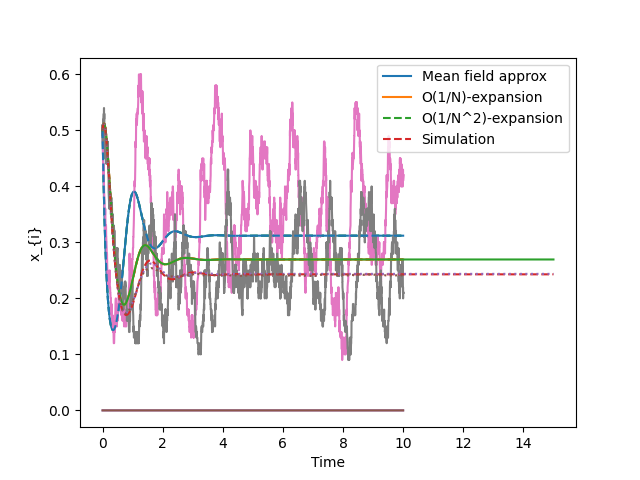

time to compute drift= 0.07220816612243652


In [3]:
ddpp.set_initial_state([.5,.5])
a=0.5
T,X = ddpp.ode(time=10)
plt.plot(T,X,'-')

# The code below should give the same curve
T,X2 = ddpp.meanFieldExpansionTransient(order=0,time=10)
plt.plot(T,X2,'--')


In [4]:
plt.plot(T,X-X2)

In [5]:
ddpp.plot_ODE_vs_simulation(N=100,time=10)

In [6]:
%time ddpp.fixed_point() #(N=10)
%time ddpp.theoretical_V()
%time ddpp.meanFieldExpansionSteadyState(order=1)

CPU times: user 8.22 ms, sys: 3.72 ms, total: 11.9 ms
Wall time: 8.9 ms
CPU times: user 50.5 ms, sys: 1.59 ms, total: 52.1 ms
Wall time: 52.8 ms
CPU times: user 43.2 ms, sys: 875 µs, total: 44.1 ms
Wall time: 43.7 ms


(array([0.31199746, 0.26950822]),
 array([ 1.28376883, -1.32697402]),
 (array([ 1.28376883, -1.32697402]),
  array([[ 1.45092322, -0.23627429],
         [-0.23627429,  0.54280068]])))

## Refined mean field ($O(1/N)$ and $O(1/N^2)$-expansion) and comparison with simulations


In [7]:
import sys, os
sys.path.append(os.path.dirname(os.getcwd()))
from misc.SIR_simulate.averageSIR import *

make: Nothing to be done for `all'.


In [8]:
a=0.5
%time T,X,V,XVW = ddpp.meanFieldExpansionTransient(order=1,time=15)
%time T,X,V,A,XVWABCD = ddpp.meanFieldExpansionTransient(order=2,time=15) # note : this code also recomputes XVW above

time to compute drift= 0.02817392349243164
CPU times: user 96.6 ms, sys: 2.33 ms, total: 99 ms
Wall time: 97.8 ms
time to compute drift= 0.1634690761566162
CPU times: user 838 ms, sys: 3.16 ms, total: 841 ms
Wall time: 840 ms


In [9]:
i=1
n=2
N=50
plt.plot(T,X[:,i],'-')
plt.plot(T,(X+V/N)[:,i],'--')
plt.plot(T,(X+V/N+A/N**2)[:,i],':')
Tsimu,Ssimu,Isimu = averageTraj(N,a,1000)
plt.plot(Tsimu,Isimu,':')
plt.legend(('Mean field approx','O(1/N)-expansion', 'O(1/N^2)-expansion','Simulation'))


### Figure for paper (unstable SIR model)

time to compute drift= 0.18954110145568848


<IPython.core.display.Javascript object>


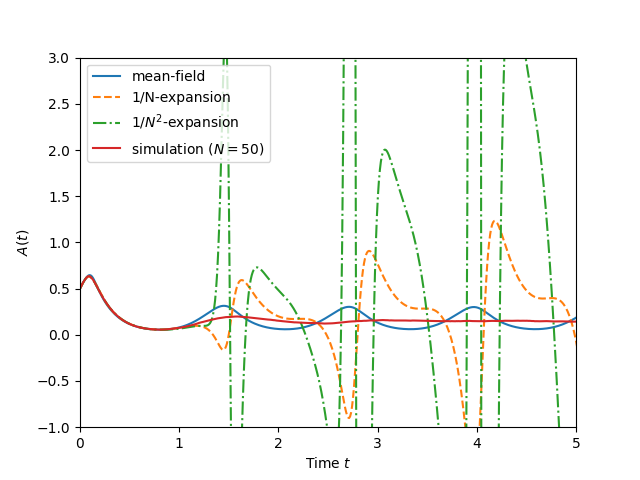

<IPython.core.display.Javascript object>


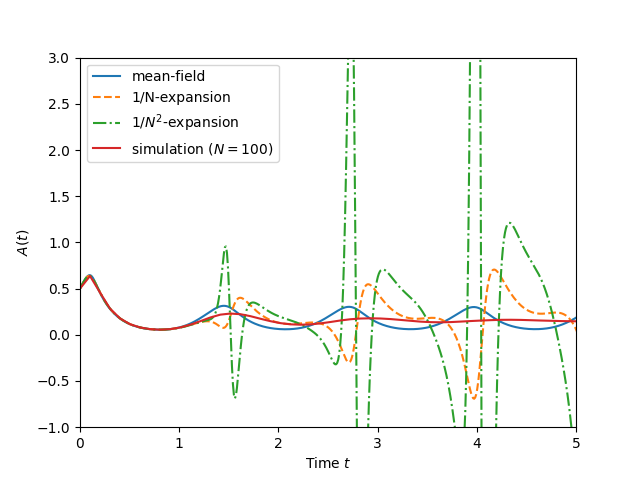

<IPython.core.display.Javascript object>


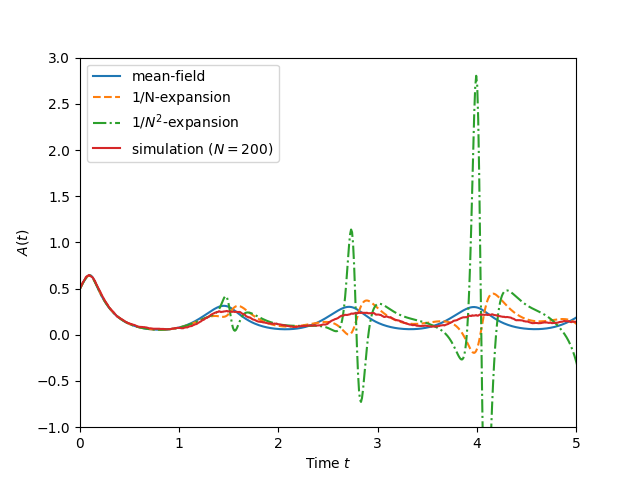

200 0.1 computed in  0.0021851062774658203 seconds


<IPython.core.display.Javascript object>


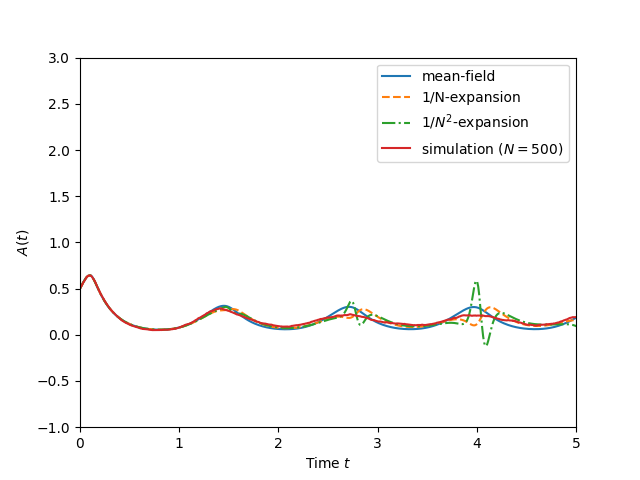

500 0.1 computed in  0.0016827583312988281 seconds


<IPython.core.display.Javascript object>


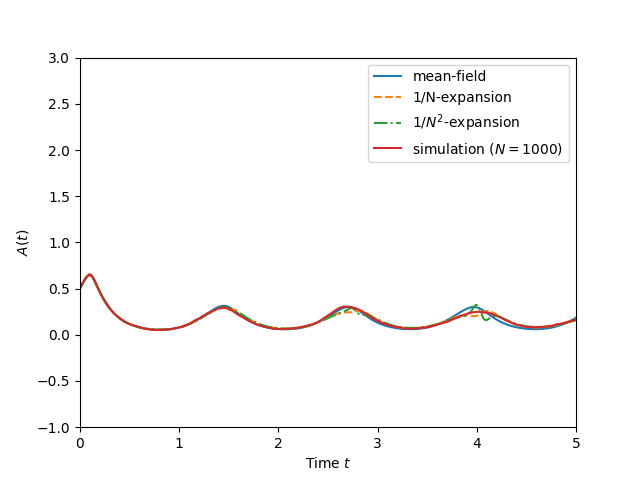

1000 0.1 computed in  0.001405954360961914 seconds
time to compute drift= 0.12054800987243652


<IPython.core.display.Javascript object>


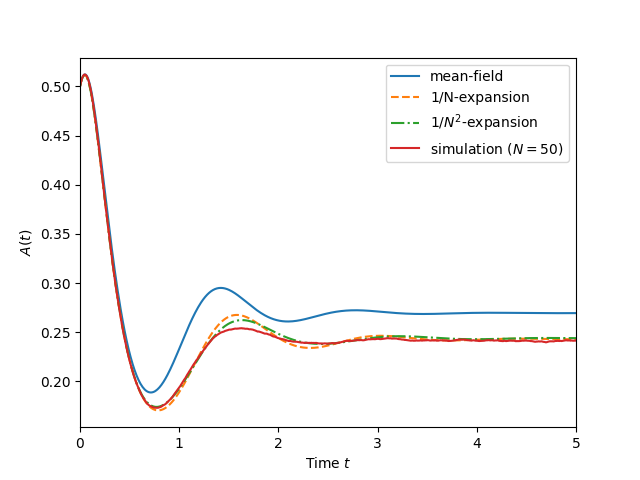

<IPython.core.display.Javascript object>


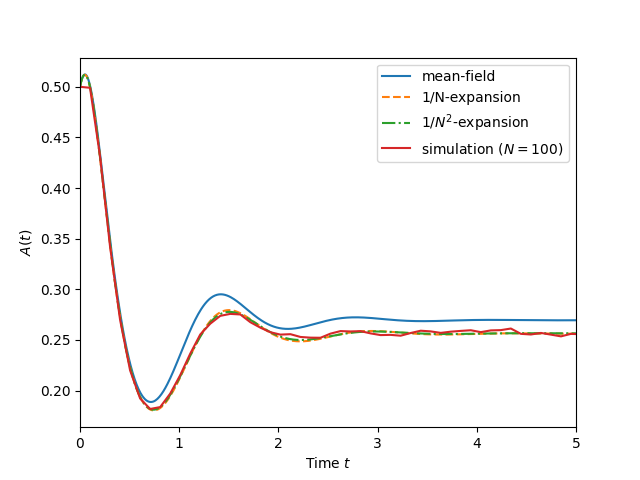

<IPython.core.display.Javascript object>


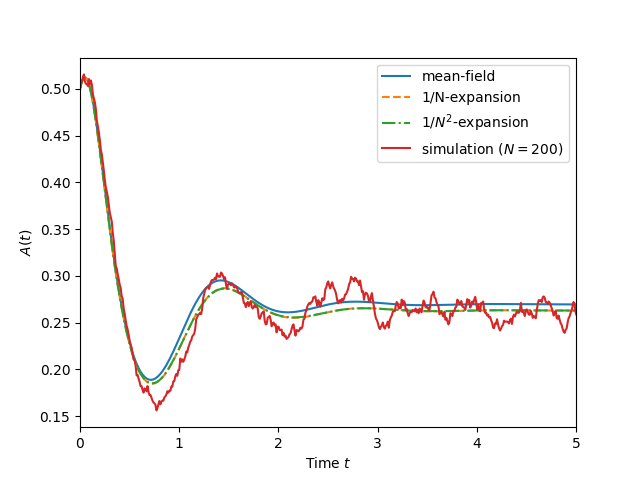

200 0.5 computed in  0.0013718605041503906 seconds


<IPython.core.display.Javascript object>


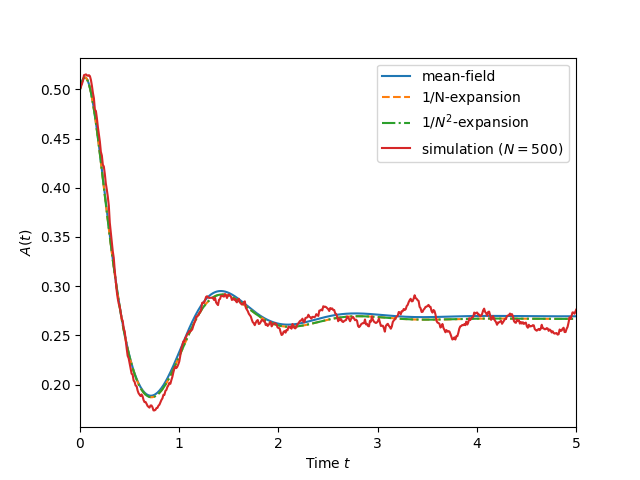

500 0.5 computed in  0.001710653305053711 seconds


<IPython.core.display.Javascript object>


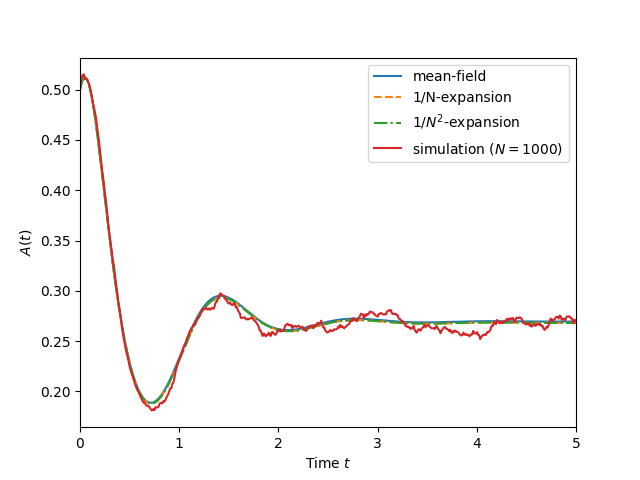

1000 0.5 computed in  0.001558065414428711 seconds


In [10]:
for a in [0.1,0.5]:
  T,X,V,A,XVWABCD = ddpp.meanFieldExpansionTransient(order=2)
  #for N in [20,50]:
  for N in [50,100,200,500,1000]:
    f = plt.figure()
    i=1
    n=2
    plt.plot(T,X[:,i])
    plt.plot(T,(X+V/N)[:,i],'--')
    plt.plot(T,(X+V/N+A/N**2)[:,i],'-.')
    Tsimu,Ssimu,Isimu = averageTraj(N,a,10)
    if i==0:
        plt.plot(Tsimu,Ssimu)
    else:
        plt.plot(Tsimu,Isimu)
    plt.legend(('mean-field','1/N-expansion','$1/N^2$-expansion','simulation ($N={}$)'.format(N)))
    plt.xlim([0,5])
    if a==0.1:
        plt.ylim([-1,3])
    if i==1:
        plt.ylabel('$A(t)$')
    elif i==0:
        plt.ylabel('$D(t)$')
    plt.xlabel('Time $t$')
    #pi = ddpp.fixed_point() #(N=10)
    #print(N,pi+V/N)
    f.savefig('outputpdf/SIR_a0{}_N{}.pdf'.format(int(a*10),N),bbox_inches='tight')


### Figure for slide

<IPython.core.display.Javascript object>


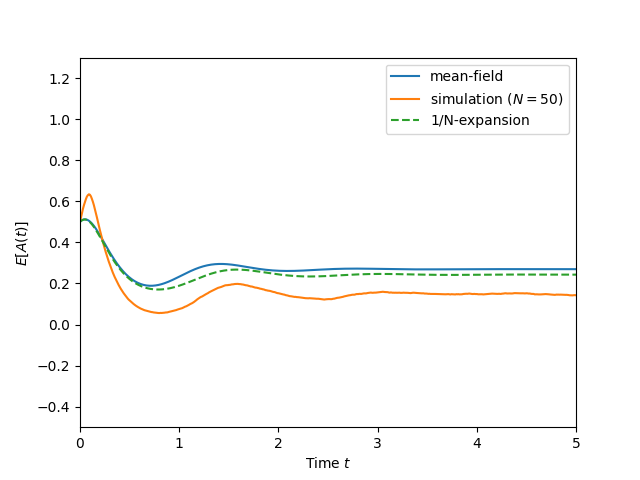

In [11]:
a=0.1
#T,X,V,A,XVWABCD = ddpp.meanFieldExpansionTransient(order=2)
for N in [50]:
    f = plt.figure()
    i=1
    n=2
    plt.plot(T,X[:,i])
    Tsimu,Ssimu,Isimu = averageTraj(N,a,10)
    plt.plot(Tsimu,Isimu)
    plt.legend(('mean-field','simulation ($N={}$)'.format(N),'1/N-expansion','$1/N^2$-expansion'))
    plt.xlim([0,5])
    plt.ylim([-.5,1.3])
    plt.ylabel('$E[A(t)]$')
    plt.xlabel('Time $t$')
    f.savefig('outputpdf/unstable1D_onlyMF.pdf',bbox_inches='tight')
    plt.plot(T,(X+V/N)[:,i],'--')
    plt.legend(('mean-field','simulation ($N={}$)'.format(N),'1/N-expansion','$1/N^2$-expansion'))
    f.savefig('outputpdf/unstable1D_only1_N.pdf',bbox_inches='tight')
    #plt.plot(T,(X+V/N+A/N**2)[:,i],'-.')
    

time to compute drift= 0.13135290145874023
50 0.1 computed in  0.0022580623626708984 seconds


<IPython.core.display.Javascript object>


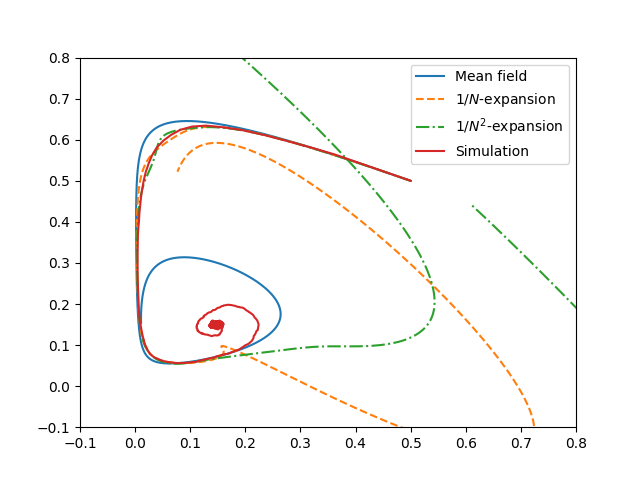

time to compute drift= 0.12151718139648438


<IPython.core.display.Javascript object>


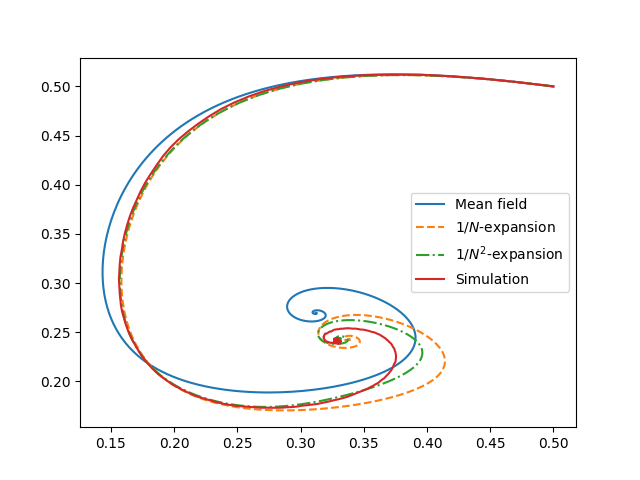

In [12]:

N=50

for a in [0.1,0.5]:
    if a == 0.1:
        T,X,V,A,XVWABCD = ddpp.meanFieldExpansionTransient(order=2,time=1.7)
    else:
        T,X,V,A,XVWABCD = ddpp.meanFieldExpansionTransient(order=2,time=5)
        
    Tsimu,Ssimu,Isimu = averageTraj(N,a,1000)
    
    f=plt.figure()
    plt.plot(X[:,0],              X[:,1]              ,'-')   # Mean field
    plt.plot((X+V/N)[:,0],       (X+V/N)[:,1]         ,'--')  # 1/N-expansion
    plt.plot((X+V/N+A/N**2)[:,0], (X+V/N+A/N**2)[:,1]  ,'-.') # 1/N^2-expansion
    plt.plot(Ssimu,Isimu)                                     # Simu
    plt.legend(('Mean field', '$1/N$-expansion','$1/N^2$-expansion','Simulation'))
    if a==0.1:
        plt.xlim([-.1,.8])
        plt.ylim([-.1,.8])
    f.savefig('SIR_2D_a0{}_N{}'.format(int(10*a),N),bbox_inches='tight')


<IPython.core.display.Javascript object>


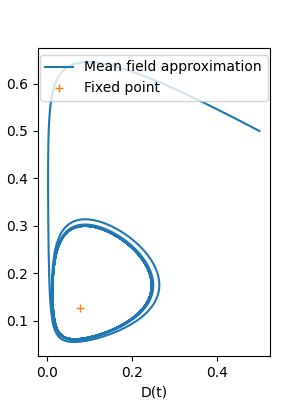

<IPython.core.display.Javascript object>


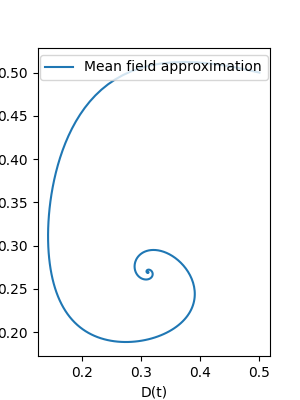

In [13]:
for a in [0.1,0.5]:
    f = plt.figure()
    f.set_size_inches(3,4)
    plt.xlabel('D(t)')
    plt.ylabel('A(t)')
    t,x=ddpp.ode(time=10)
    plt.plot(x[:,0],x[:,1])
    if a==0.1:
        plt.plot([0.078],[0.126],'+')
    plt.legend(('Mean field approximation','Fixed point'),loc='upper center')
    f.savefig('outputpdf/SIR_2D_a0{}.pdf'.format(int(a*10)),bbox_inches='tight')

# MISC, including old figures and test with steady-state

<IPython.core.display.Javascript object>


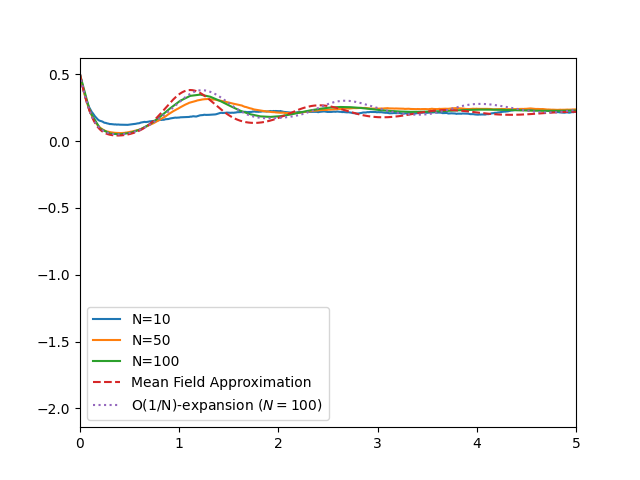

10 0.3 computed in  0.0012140274047851562 seconds
50 0.3 computed in  0.0011081695556640625 seconds
time to compute drift= 0.05485105514526367


In [14]:
f = plt.figure()
a=0.3
myN = [10,50,100]
for N in myN:
    t,s,i = averageTraj(N,a,1000)
    plt.plot(t,s)
T,X = ddpp.ode(time=10)
plt.plot(T,X[:,0],'--')

T,X,V,XVW = ddpp.meanFieldExpansionTransient(time=10)
plt.plot(T,(X+V/100)[:,0],':')
legds= ['N={}'.format(N) for N in myN]
legds.append('Mean Field Approximation')
legds.append('O(1/N)-expansion ($N=100$)')
plt.legend(legds)
plt.xlim([0,5])
f.savefig('outputpdf/SIR_a03.pdf',bbox_inches='tight')

In [15]:
a=0.3
i=1
T,X,V,VW=ddpp.meanFieldExpansionTransient(time=1000)
print('  N & Mean-field & O(1/N)-expansion & Simulation')
for N in [10,20,30,50,100,500,1000,2000]:
    print('{:4d} & {:.3f}\t & {:.3f} \t\t& {:.3f}\\\\'.format(
        N, X[-1,i], (X+V[-1,i]/N)[-1,i], steadyState(N,a)[i]) )
    
pi = ddpp.fixed_point()
for N in [10,20,30,50,100,500,1000,2000]:
    print(N,N*(steadyState(N,a)-pi))

time to compute drift= 0.029536962509155273
  N & Mean-field & O(1/N)-expansion & Simulation
  10 & 0.242	 & 0.039 		& 0.122\\
  20 & 0.242	 & 0.140 		& 0.165\\
  30 & 0.242	 & 0.174 		& 0.186\\
  50 & 0.242	 & 0.201 		& 0.207\\
 100 & 0.242	 & 0.221 		& 0.224\\
 500 & 0.242	 & 0.238 		& 0.238\\
1000 & 0.242	 & 0.240 		& 0.240\\
2000 & 0.242	 & 0.241 		& 0.241\\
10 [ 0.04060385 -1.19354788]
20 [ 0.4767847  -1.53261115]
30 [ 0.83054955 -1.66581743]
50 [ 1.33953324 -1.75649188]
100 [ 1.97966649 -1.78721976]
500 [ 2.87901744 -1.91127381]
1000 [ 2.92981489 -2.01587762]
2000 [ 3.19966978 -1.95839524]


In [16]:
i=1
myN = [10,20,30,50,100,500,1000,2000]
mySS = [steadyState(N,a)[i] for N in myN]
plt.plot(myN,myN*(mySS-X[-1,i]))